In [22]:
%load_ext autoreload
%autoreload 2

import ROOT
from pathlib import Path
import sys
import pandas as pd
import numpy as np
import yaml

path = Path().resolve() / "src"
sys.path.append(str(path))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from pipeline import root_to_pandas, get_split

cols = ['numStubs', 'numPS', 'numGaps','track.cot','track.chi20', 'track.chi21', 'track.zT', 'track.inv2R', 'ps', 'chi2Bend', 'l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7']

file_path = 'tschuh/mva.root'
tree_name = 'NtupleMakerMVA/data;1'

df = root_to_pandas(file_path, tree_name)
X_train, X_val, X_test, y_train, y_val, y_test = get_split(df, cols, 'match', 0.1, 0.1, 42)

In [13]:
import ROOT

df = pd.concat([df_1, df_2], axis = 0)

In [21]:
(df['match'] == 0).sum()

22992

### Evaluation


In [33]:
exp_path = Path('experiments/run008')
with open(exp_path / 'config.yaml') as f:
    cfg = yaml.safe_load(f)

In [39]:
from eval import evalaute, get_discriminant_plots
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# y_valid, p_valid = evalaute(exp_path)

tpr_dict = {}
fpr_dict = {}

for i in [8]:
    exp_path = Path(f'experiments/run00{i}')
    with open(exp_path / 'config.yaml') as f:
        cfg = yaml.safe_load(f)
    y_valid, p_valid, model = evalaute(exp_path)
    fpr, tpr, thresholds = roc_curve(y_valid, p_valid)
    # roc_auc = auc(fpr, tpr)
    tpr_dict[i] = tpr
    fpr_dict[i] = fpr
# save_root_file = str(exp_path / 'disc_curves.root')
# bins = 100
# get_discriminant_plots(y_valid, p_valid, bins, save_root_file)


In [40]:
model.num_boosted_rounds()

64

In [41]:
from xgboost import to_graphviz
import xgboost

dot = to_graphviz(model, num_trees=0)  # much smaller tree
dot.render("xgb_tree_small", format="png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0720162 to fit


'xgb_tree_small.png'

12

#### Train test split

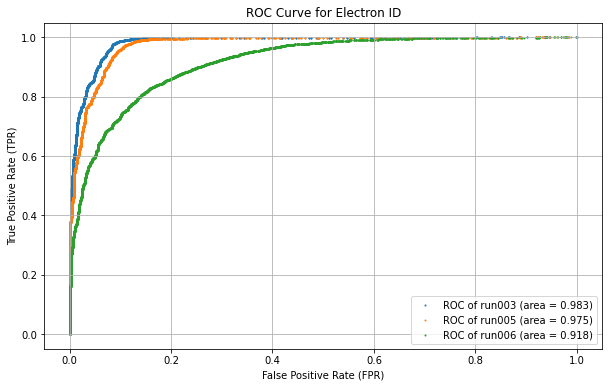

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve



L_FP = cfg['model']['L_FP']
L_FN = cfg['model']['L_FN']
tau = 0.33 #L_FP / (L_FP + L_FN)

# best_idx = np.argmin(np.abs(thresholds - tau))
# print(tpr[best_idx],fpr[best_idx])
# plt.figure(figsize=(10,6))
# plt.scatter(fpr_1[best_idx], tpr_1[best_idx], color="red", s=80,
#             label=f"Operating point (τ={tau:.2f})")
plt.figure(figsize=(10,6))
for i in [3,5,6]:
    fpr = fpr_dict[i]
    tpr = tpr_dict[i]
    plt.scatter(fpr, tpr, label=f"ROC of run00{i} (area = {auc(fpr, tpr):.3f})", s = 1)
# plt.scatter(fpr_1, tpr_1, label=f"ROC curve L_FP = L_FN (area = {roc_auc:.3f})", s = 1)
# plt.scatter(fpr_1, tpr_1, label=f"ROC curve L_FP = L_FN (area = {roc_auc:.3f})", s = 1)
# plt.scatter(fpr_2, tpr_2, label=f"ROC curve L_FP < L_FN (area = {roc_auc:.3f})", s = 1)
# plt.plot([0, 1], [0, 1], 'k--', label="Random chance")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Electron ID")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()